# Regressão Softmax com dados do MNIST utilizando gradiente descendente estocástico por minibatches

O objetivo deste notebook é ilustrar
- o uso do gradiente estocástico por mini-batchs
- utilizando as classes Dataset e DataLoater.

A apresentação da perda nos gráficos é um pouco diferente da usual, mostrando a perda de cada um dos vários minibatches dentro de cada época, de forma que as épocas são apresentadas com valores fracionários.

## Importação das bibliotecas

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

import torch
from torch.autograd import Variable
from torch.utils.data import DataLoader

import torchvision
from torchvision.datasets import MNIST

## Dataset e dataloader

### Definição do tamanho do minibatch

In [2]:
batch_size = 100

### Carregamento, criação dataset e do dataloader

In [12]:
dataset_dir = 'MNIST/'

dataset_train = MNIST(dataset_dir, train=True, download=True,
                      transform=torchvision.transforms.ToTensor())

loader_train = DataLoader(dataset_train, batch_size=batch_size, shuffle=True)

print('Número de minibatches de trenamento:', len(loader_train))

x_train, y_train = next(iter(loader_train))
print("\nDimensões dos dados de um minibatch:", x_train.size())
print("Valores mínimo e máximo dos pixels: ", torch.min(x_train), torch.max(x_train))
print("Tipo dos dados das imagens:         ", type(x_train))
print("Tipo das classes das imagens:       ", type(y_train))

Número de minibatches de trenamento: 600

Dimensões dos dados de um minibatch: torch.Size([100, 1, 28, 28])
Valores mínimo e máximo dos pixels:  tensor(0.) tensor(1.)
Tipo dos dados das imagens:          <class 'torch.Tensor'>
Tipo das classes das imagens:        <class 'torch.Tensor'>


### Usando todas as amostras do MNIST

Neste exemplo utilizaremos todas as amostras de treinamento.

In [4]:
print('Número de minibatches de trenamento:', len(loader_train))
n_batches_train = len(loader_train)
total_samples = dataset_train.train_data.size(0)

Número de minibatches de trenamento: 600


/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:76: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


## Modelo

In [5]:
model = torch.nn.Linear(28*28, 10)

In [6]:
x = torch.ones(28*28).reshape(1, 784)
print(x.shape)
predict = model(x)
predict

torch.Size([1, 784])


tensor([[-0.4002,  0.9287, -0.4237,  0.6016, -1.1607,  0.5629,  0.1452,  0.1378,
          0.6843, -0.0520]], grad_fn=<AddmmBackward0>)

## Treinamento

### Inicialização dos parâmetros

In [13]:
n_epochs = 5
learningRate = 0.5

# Utilizaremos CrossEntropyLoss como função de perda
criterion = torch.nn.CrossEntropyLoss()

# Gradiente descendente
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

### Laço de treinamento dos parâmetros

In [14]:
epochs = []
losses = []

total_trained_samples = 0
for i in range(n_epochs):
    for k,(x_train, y_train) in enumerate(loader_train):
        # Transforma a entrada para uma dimensão
        inputs = Variable(x_train.view(-1, 28 * 28))
        # predict da rede
        outputs = model(inputs)

        # calcula a perda
        loss = criterion(outputs, Variable(y_train))

        # zero, backpropagation, ajusta parâmetros pelo gradiente descendente
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_trained_samples += x_train.size(0)
        epochs.append(total_trained_samples / total_samples)
        losses.append(loss.data)

In [15]:
print('Final loss:', loss.data)

Final loss: tensor(0.1737)


### Visualizando gráfico de perda durante o treinamento

Text(0.5, 0, 'época')

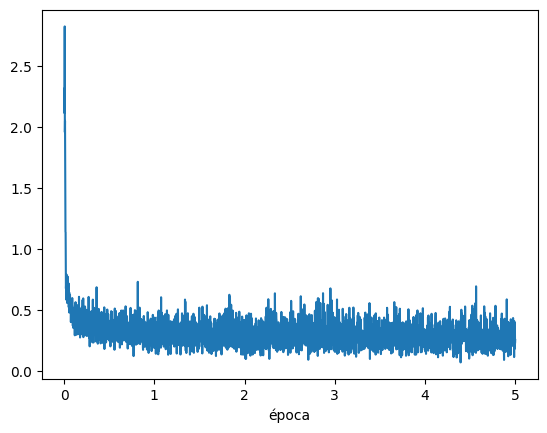

In [10]:
plt.plot(epochs, losses)
plt.xlabel('época')

### Visualização usual da perda, somente no final de cada minibatch

Text(0.5, 0, 'época')

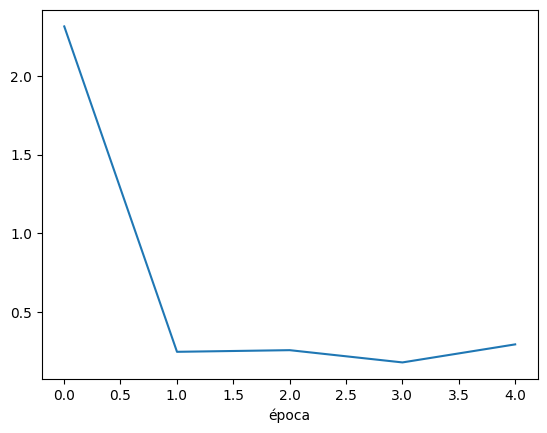

In [11]:
plt.plot(epochs[:5 * n_batches_train +1:n_batches_train], losses[:5 * n_batches_train+1:n_batches_train])
plt.xlabel('época')

# Atividades

## Perguntas

1. Qual é o tamanho do mini-batch?
resposta: O tamanho do mini-batch (batch_size) é 100.
2. Em uma época, quantos mini-batches existem?
resposta: Em uma época, existem 600 mini-batches.
3. Qual é a definição de época?
resposta: Uma época é uma passagem pelo conjunto de dados de treinamento. Durante um tempo, Durante uma época, o modelo é treinado em todas as amostras de treinamento de uma vez

## Exercícios


1. Coloque um print no final de cada minibatch, no mesmo estilo do print do final de época, no seguinte estilo:
    - Época: 1/4, batch: 600
2. Altere o tamanho de minibatch (batch_size) algumas vezes, refaça o treinamento, e compare no gráfico abaixo a queda da perda para cada tamanho de minibatch.

1. Coloque um print no final de cada minibatch, no mesmo estilo do print do final de época, no seguinte estilo:
    - Época: 1/4, batch: 600


In [18]:
for epoch in range(n_epochs):
    epoch_loss = 0
    for i, (inputs, labels) in enumerate(loader_train):
        # Forward pass
        inputs = inputs.view(inputs.size(0), -1)
        outputs = model(inputs)
        loss = criterion(outputs, labels)


        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()

        # Print do final do mini-batch
        print(f'Época: {epoch+1}/{n_epochs}, batch: {i+1}')

    avg_epoch_loss = epoch_loss / len(loader_train)
    losses.append(avg_epoch_loss)


Época: 1/5, batch: 1
Época: 1/5, batch: 2
Época: 1/5, batch: 3
Época: 1/5, batch: 4
Época: 1/5, batch: 5
Época: 1/5, batch: 6
Época: 1/5, batch: 7
Época: 1/5, batch: 8
Época: 1/5, batch: 9
Época: 1/5, batch: 10
Época: 1/5, batch: 11
Época: 1/5, batch: 12
Época: 1/5, batch: 13
Época: 1/5, batch: 14
Época: 1/5, batch: 15
Época: 1/5, batch: 16
Época: 1/5, batch: 17
Época: 1/5, batch: 18
Época: 1/5, batch: 19
Época: 1/5, batch: 20
Época: 1/5, batch: 21
Época: 1/5, batch: 22
Época: 1/5, batch: 23
Época: 1/5, batch: 24
Época: 1/5, batch: 25
Época: 1/5, batch: 26
Época: 1/5, batch: 27
Época: 1/5, batch: 28
Época: 1/5, batch: 29
Época: 1/5, batch: 30
Época: 1/5, batch: 31
Época: 1/5, batch: 32
Época: 1/5, batch: 33
Época: 1/5, batch: 34
Época: 1/5, batch: 35
Época: 1/5, batch: 36
Época: 1/5, batch: 37
Época: 1/5, batch: 38
Época: 1/5, batch: 39
Época: 1/5, batch: 40
Época: 1/5, batch: 41
Época: 1/5, batch: 42
Época: 1/5, batch: 43
Época: 1/5, batch: 44
Época: 1/5, batch: 45
Época: 1/5, batch: 

Alterar batch_size e Comparar os Resultados

A saída de streaming foi truncada nas últimas 5000 linhas.
Época: 1/4, batch: 630
Época: 1/4, batch: 631
Época: 1/4, batch: 632
Época: 1/4, batch: 633
Época: 1/4, batch: 634
Época: 1/4, batch: 635
Época: 1/4, batch: 636
Época: 1/4, batch: 637
Época: 1/4, batch: 638
Época: 1/4, batch: 639
Época: 1/4, batch: 640
Época: 1/4, batch: 641
Época: 1/4, batch: 642
Época: 1/4, batch: 643
Época: 1/4, batch: 644
Época: 1/4, batch: 645
Época: 1/4, batch: 646
Época: 1/4, batch: 647
Época: 1/4, batch: 648
Época: 1/4, batch: 649
Época: 1/4, batch: 650
Época: 1/4, batch: 651
Época: 1/4, batch: 652
Época: 1/4, batch: 653
Época: 1/4, batch: 654
Época: 1/4, batch: 655
Época: 1/4, batch: 656
Época: 1/4, batch: 657
Época: 1/4, batch: 658
Época: 1/4, batch: 659
Época: 1/4, batch: 660
Época: 1/4, batch: 661
Época: 1/4, batch: 662
Época: 1/4, batch: 663
Época: 1/4, batch: 664
Época: 1/4, batch: 665
Época: 1/4, batch: 666
Época: 1/4, batch: 667
Época: 1/4, batch: 668
Época: 1/4, batch: 669
Época: 1/4, batch: 67

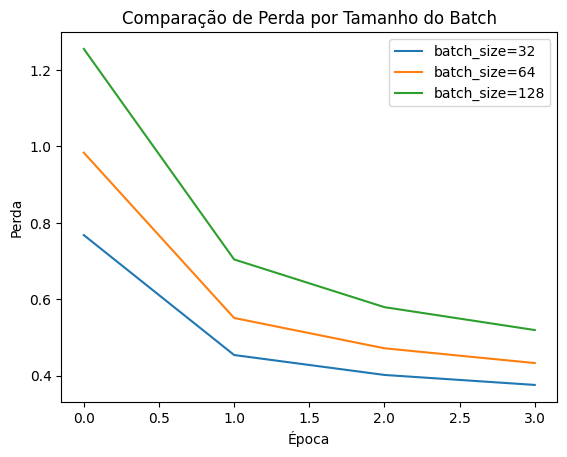

In [21]:
# Função para treinar o modelo e registrar as perdas
def train_model(batch_size):
    # Carregar os dados
    dataset_train = MNIST('MNIST/', train=True, download=True, transform=torchvision.transforms.ToTensor())
    loader_train = DataLoader(dataset_train, batch_size=batch_size, shuffle=True)

    # Inicializar o modelo, a função de perda e o otimizador

    model = torch.nn.Linear(28*28, 10)
    criterion = torch.nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

    losses = []
    n_epochs = 4

    for epoch in range(n_epochs):
        epoch_loss = 0
        for i, (inputs, labels) in enumerate(loader_train):
            inputs = inputs.view(inputs.size(0), -1)  # Flatten the images
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            epoch_loss += loss.item()

            # Print do final do mini-batch
            print(f'Época: {epoch+1}/{n_epochs}, batch: {i+1}')

        avg_epoch_loss = epoch_loss / len(loader_train)
        losses.append(avg_epoch_loss)

    return losses

# Valores de batch_size a serem testados
batch_sizes = [32, 64, 128]

# Armazenar as perdas para cada tamanho de batch
all_losses = {}
for batch_size in batch_sizes:
    print(f'Treinando com batch_size={batch_size}')
    losses = train_model(batch_size)
    all_losses[batch_size] = losses

# Plotar as perdas
for batch_size, losses in all_losses.items():
    plt.plot(losses, label=f'batch_size={batch_size}')

plt.xlabel('Época')
plt.ylabel('Perda')
plt.title('Comparação de Perda por Tamanho do Batch')
plt.legend()
plt.show()

## Conclusões sobre os experimentos deste notebook


O batch_size de 32 é mais rápido que os batchs maiores. Isso pode ser atribuído ao fato de as atualizações de gradiente serem mais frequentes, permitindo que o modelo se ajuste mais rapidamente aos dados.
O batch_size de 128 é mais lento, mas a perda diminui mais rápido.
O batch_size de 32 provavelmente resultou em tempos de treinamento mais longos por época devido ao maior número de atualizações necessárias. As atualizações frequentes podem ter ajudado nos estágios iniciais.
Batch_sizes maiores são mais rápidos porque precisam de mais atualizações por época. Isso pode ser bom para o treinamento, especialmente em ambientes com pouco tempo de processamento.